# PCA(Principle Component Analysis)

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data
df = pd.read_csv("pca_train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df["label"]

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
#save the labels into a variable

l = df["label"]

# Drop the label feature and store the pixel data in d.
d = df.drop("label",axis=1)

In [8]:
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(l.shape)

(42000,)


In [11]:
print(d.shape)

(42000, 784)


In [14]:
d.iloc[2], l[2]

(pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
 pixel4      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Name: 2, Length: 784, dtype: int64,
 1)

# visualize the data

1
0
1
4
0
0
7
3
5


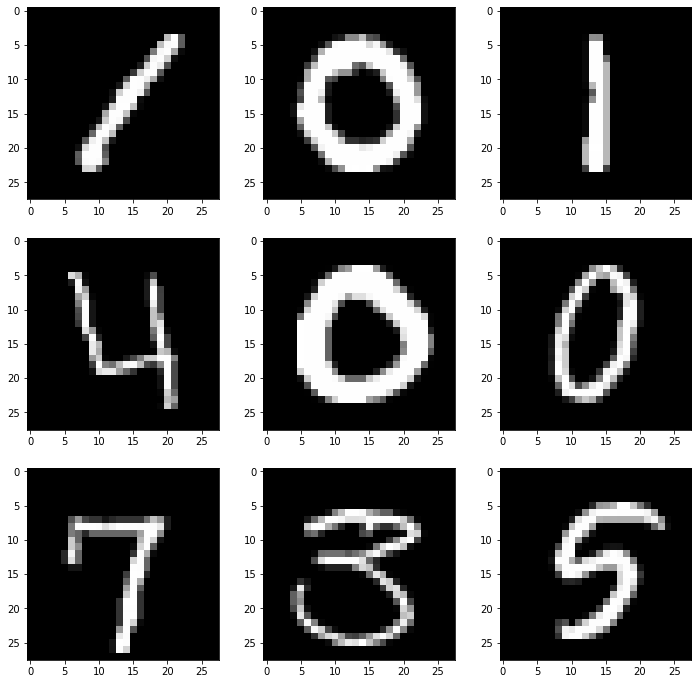

In [25]:
# visualize the data

plt.figure(figsize = (12,12))

for i in range(0,9):
    plt.subplot(331+i)
    # reshape from 1d to 2d pixel array
    grid_data = d.iloc[i].to_numpy().reshape(28,28)
    plt.imshow(grid_data, interpolation="none",cmap = "gray")
    print(l[i])
    
plt.show()
    

# 2D Visualization using PCA

In [27]:
# first pick 25k data from the dataset

labels = l.head(25000)
data = d.head(25000)

print("The shape of labels", labels.shape)
print("The shape of data", data.shape)

The shape of labels (25000,)
The shape of data (25000, 784)


# Data-preprocessing: Standardizing the data

In [28]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data)

In [30]:
scaled_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#find the Co variance matrix : A^T * A

sample_data = scaled_data

#Matrix Multiplication
cov_matrix = np.matmul(sample_data.T, sample_data)

In [33]:
print("Shape of Scaled data = ", scaled_data.shape)

print("Shape of covariance Matrix = ",cov_matrix.shape)

Shape of Scaled data =  (25000, 784)
Shape of covariance Matrix =  (784, 784)


In [45]:
# finding the top 2 eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

values, vectors = eigh(cov_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [46]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 25000)  =  (2, 25000)


In [47]:
new_coordinates

array([[-5.22287591,  6.12799651, -1.64379482, ...,  3.09452488,
        10.46885531, -5.16732643],
       [-5.10275905, 19.29717876, -7.66043132, ..., -2.96871934,
         4.34348869,  4.36297871]])

In [48]:
# appending label to the 2d projected data

new_coordinates = np.vstack((new_coordinates,labels)).T


In [49]:
new_df = pd.DataFrame(data = new_coordinates, columns = ["1st Priniciple Component","2nd Principle Component", "label"])

print(new_df)

       1st Priniciple Component  2nd Principle Component  label
0                     -5.222876                -5.102759    1.0
1                      6.127997                19.297179    0.0
2                     -1.643795                -7.660431    1.0
3                      5.713660                -0.433031    4.0
4                      6.137940                26.586445    0.0
...                         ...                      ...    ...
24995                 -8.858154                -0.188615    8.0
24996                 10.526840                10.982936    0.0
24997                  3.094525                -2.968719    7.0
24998                 10.468855                 4.343489    4.0
24999                 -5.167326                 4.362979    5.0

[25000 rows x 3 columns]


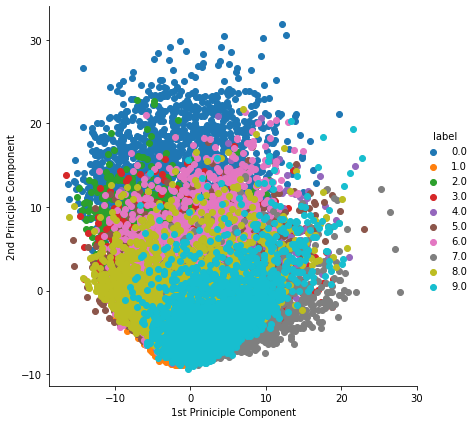

In [52]:
import seaborn as sns

sns.FacetGrid(new_df,hue = "label",height = 6).map(plt.scatter, "1st Priniciple Component",
                                                 "2nd Principle Component").add_legend()
plt.show()

# PCA using Scikit Learn

In [56]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

In [57]:
# configuring the parameteres
# the number of components = 2


pca_data = pca.fit_transform(sample_data)


# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (25000, 2)


In [58]:
pca_data

array([[-5.10272899, -5.22304435],
       [19.29716802,  6.12783513],
       [-7.66046121, -1.64363453],
       ...,
       [-2.96873782,  3.09434376],
       [ 4.34342553, 10.46854398],
       [ 4.36292702, -5.16757873]])

In [59]:
# attaching the label for each 2-d data point 

pca_data = np.vstack((pca_data.T,labels)).T

In [64]:
pca_data

array([[-5.10272899, -5.22304435,  1.        ],
       [19.29716802,  6.12783513,  0.        ],
       [-7.66046121, -1.64363453,  1.        ],
       ...,
       [-2.96873782,  3.09434376,  7.        ],
       [ 4.34342553, 10.46854398,  4.        ],
       [ 4.36292702, -5.16757873,  5.        ]])

In [65]:
pca_df = pd.DataFrame(data = pca_data, columns = ("1st_principle", "2nd_principle", "label"))

pca_df.head()

,1st_principle,2nd_principle,label
0,-5.102729,-5.223044,1.0
1,19.297168,6.127835,0.0
2,-7.660461,-1.643635,1.0
3,-0.433024,5.713617,4.0
4,26.586429,6.137775,0.0


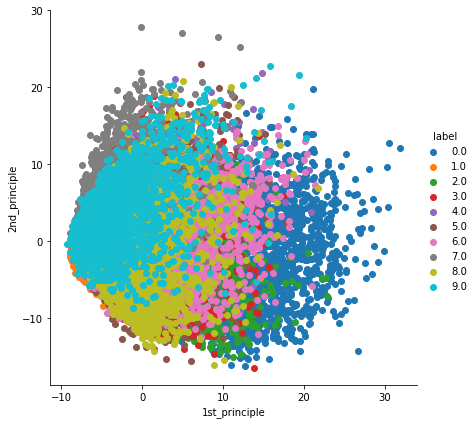

In [67]:
sns.FacetGrid(pca_df,hue = "label",height = 6).map(plt.scatter,"1st_principle","2nd_principle").add_legend()
plt.show()

# PCA for Dimension Reduction(Non Visualization)

In [71]:
pca = decomposition.PCA(n_components = 784)

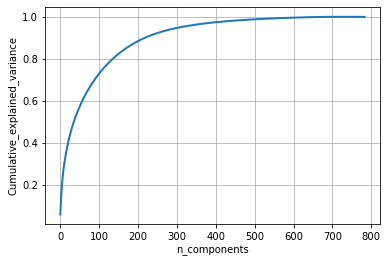

In [74]:
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


**If we take 200-dimensions, approx. 90% of variance is expalined.**